The Local Binary Pattern (LBP) operator describes the surroundings of a pixel by generating a bit-code from the binary derivatives of a pixel.

In [11]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

Utility functions

In [12]:
def ICV_greyscale_histogram(image):
    bins = np.arange(0,256) #creating empty array of pixel values from 0-255
    bins = bins.reshape(256,1).ravel()
    
    #creating emppty array to store pixel count values
    grey_hist = np.zeros((bins.shape[0]))

    for i in range(bins.shape[0]): #iterating over bins indexes i.e 0,1,.......,255
        #getting sum of booelan values which pixel value matches the index of bins
        grey_hist[i] = np.sum(image[:,:]==i)
    
    return grey_hist.ravel(),bins

In [3]:
def ICV_greyscale(image):
    #create copy of original_image
    grey = np.zeros((image.shape[0],image.shape[1]))
    #using BT.601 to convert image to greysclae
    #Gray = (Red * 0.299 + Green * 0.587 + Blue * 0.114)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grey[i][j] = image[i][j][0] * 0.299 + image[i][j][1] * 0.587 + image[i][j][2] * 0.114
    
    return grey

In [13]:
def ICV_histogram_intersection(hist1, hist2):
    #variables to store intersection sum
    intersect = 0
    
    for i in range(len(hist1)):
        #calculation sum of min intercestion 
        intersect += min(float(hist1[i]),float(hist2[i]))
        
    return intersect

a) Write a function that divides a greyscale image into equally sized non-overlapping windows and returns the feature descriptor for each window as distribution of LBP codes. For each pixel in the window, compare the pixel to each of its 8 neighbours. Convert the resulting bit-codes (base 2) to decimals (base 10 numbers) and compute their histogram over the window. Normalize the histogram (which is now a feature descriptor representing the window). Show in the report the resulting images.

In [14]:
#Utility function for comparing values of neighbours 
def ICV_feature_compare(x,y):
    if x>y:
        #neighbour value is greater than middel value then return 1
        return 1
    else:
        #if less than return 0
        return 0

In [6]:
def ICV_feature_descriptor(image, block_size, show_hist = True):
    #dividing image in equal size blocks
    windows = [] #array to store each block
    for i in range(0,image.shape[0],block_size):
        for j in range(0,image.shape[1],block_size): 
            windows.append(image[i:i+block_size, j:j+block_size])
    #print(windows)

    
    feature_windows = []
    feature_window_normalize = []
    for count, window in enumerate(windows):
        padded_window = np.zeros((window.shape[0]+2,window.shape[1]+2))
        padded_window[1:-1,1:-1] = window[:,:]
        
        feature_window = window.copy()
        for i in range(0,feature_window.shape[0]):
            for j in range(0,feature_window.shape[1]):
                #calulate neighour
                n8,n7,n6,n5,n4,n3,n2,n1 = padded_window[i-1,j-1],padded_window[i-1,j],padded_window[i-1,j+1],padded_window[i,j+1],padded_window[i+1,j+1],padded_window[i+1,j],padded_window[i+1,j-1],padded_window[i,j-1]
                n8 = ICV_feature_compare(n1,feature_window[i][j])
                n7 = ICV_feature_compare(n2,feature_window[i][j])
                n6 = ICV_feature_compare(n3,feature_window[i][j])
                n5 = ICV_feature_compare(n4,feature_window[i][j])
                n4 = ICV_feature_compare(n5,feature_window[i][j])
                n3 = ICV_feature_compare(n6,feature_window[i][j])
                n2 = ICV_feature_compare(n7,feature_window[i][j])
                n1 = ICV_feature_compare(n8,feature_window[i][j])
                
                
                feature_window[i][j] = (2**0) * n1 + (2**1) * n2 + (2**2) * n3 + (2**3) * n4 + (2**4) * n5 + (2**5) * n6 + (2**6) * n7 + (2**7) * n8
        
        feature_windows.append(feature_window)
        
        hist, bins = ICV_greyscale_histogram(feature_window)
        hist = np.array(hist)
        norm_hist = hist.copy()
        norm_hist[:] = (hist[:] - np.min(hist)) / (np.max(hist) - np.min(hist))
        
        feature_window_normalize.append(norm_hist)
        
        if count%1000 == 0 and show_hist==True:
            plt.axis('off')
            plt.imshow(window,cmap='gray')
            plt.title(f'Original Window no:{count}')
            plt.show()
            
            plt.axis('off')
            plt.imshow(feature_window,cmap='gray')
            plt.title(f'LBP of Window no:{count}')
            plt.show()
            
            
            plt.plot(bins, hist.ravel())
            plt.title(f'Histogram of LBP no:{count}')
            plt.show()
            
            
            plt.plot(bins, norm_hist.ravel())
            plt.title(f'Normalized Histogram of LBP no:{count}')
            plt.show()
            
    return feature_windows, np.array(feature_window_normalize)


b) Come up with a descriptor that represents the whole image as consisting of multiple windows. For example, you could combine several local descriptions into a global description by concatenation. Discuss in the report alternative approaches. Using the global descriptor you created, implement a classification process that separates the images in the dataset into two categories: face images and non-face images (for example, you could use histogram similarities). Comment the results in the report. Is the global descriptor able to represent whole images of different types (e.g. faces vs. cars)? Identify problems (if any), discuss them in the report and suggest possible solutions.

In [7]:
def ICV_global_descriptor(image, block_size,show_img=False, show_hist=False):
    
    image_local_descriptor, normalized_histogram = ICV_feature_descriptor(image, block_size,show_hist = False)

    img = image.copy()
    count = 0
    for i in range(0,img.shape[0],block_size):
        for j in range(0,img.shape[1],block_size): 
            img[i:i+block_size, j:j+block_size] =  image_local_descriptor[count]
            count+=1
    if show_img:
        plt.imshow(img, cmap ='gray')
        plt.show()
    
    return img, normalized_histogram
    


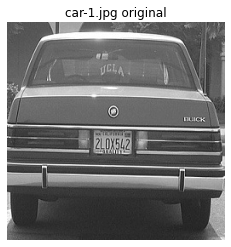

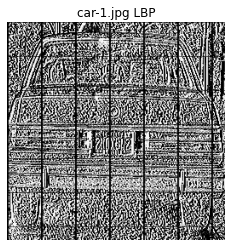

Image contain non-face objects


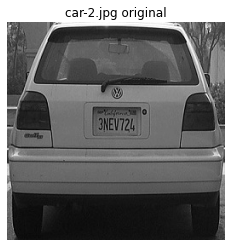

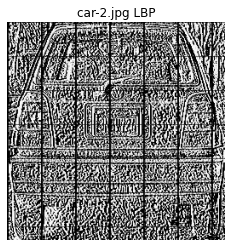

Image contain non-face objects


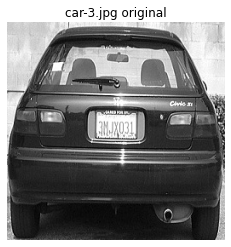

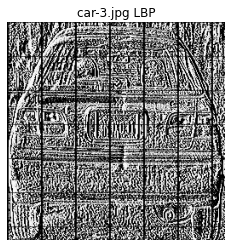

Image contain non-face objects


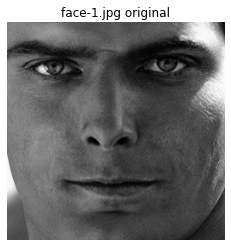

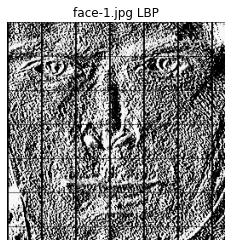

Image contain non-face objects


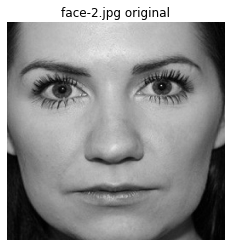

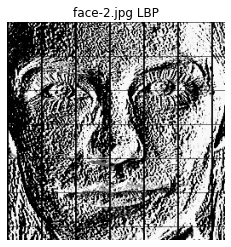

Image contains face


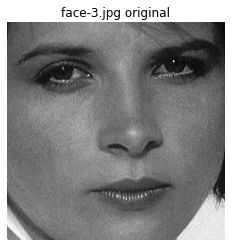

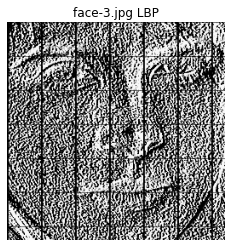

Image contain non-face objects


In [8]:
block_size = 40

train_face_A = cv2.imread('./DatasetA/face-1.jpg')
train_face_A = ICV_greyscale(train_face_A)

train_face_lsb_A,train_face_norm_hist_A = ICV_global_descriptor(train_face_A, block_size,show_img=False, show_hist = False)

train_face_B = cv2.imread('./DatasetA/face-2.jpg')
train_face_B = ICV_greyscale(train_face_B)

train_face_lsb_B,train_face_norm_hist_B = ICV_global_descriptor(train_face_B, block_size,show_img=False, show_hist = False)

train_face_C = cv2.imread('./DatasetA/face-3.jpg')
train_face_C = ICV_greyscale(train_face_C)

train_face_lsb_C,train_face_norm_hist_C = ICV_global_descriptor(train_face_C, block_size,show_img=False, show_hist = False)



threshold_A_B = ICV_histogram_intersection(train_face_norm_hist_A.ravel(), train_face_norm_hist_B.ravel())
threshold_B_C = ICV_histogram_intersection(train_face_norm_hist_B.ravel(), train_face_norm_hist_C.ravel())
threshold_A_C = ICV_histogram_intersection(train_face_norm_hist_A.ravel(), train_face_norm_hist_C.ravel())

classify_threshold = np.mean([threshold_A_B,threshold_A_C,threshold_B_C])



text_output_path =os.getcwd() + '\\texture_output' #setting output image path
if not os.path.isdir(text_output_path):
    os.mkdir(text_output_path)

images_path = os.getcwd()+'/DatasetA' #input image path
for images in os.listdir(images_path): #parsing through all files in directory
    if images[-3:]=='jpg': #checking if file is image or not
        images_name = images_path + '/' + images #getting image name
        img = cv2.imread(images_name) #reading image
        
        img = ICV_greyscale(cv2.imread(images_name))

        img_lsb, img_norm_hist = ICV_global_descriptor(img, block_size,show_img=False, show_hist = False)
        
        img_threshold = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_B.ravel())
        
        threshold_img_A = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_A.ravel())
        threshold_img_B = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_B.ravel())
        threshold_img_C = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_C.ravel())

        img_threshold = np.mean([threshold_img_A,threshold_img_B,threshold_img_C])
        
        plt.axis('off')
        plt.imshow(img,cmap='gray')
        plt.title(images + ' original')
        plt.savefig(text_output_path+"\\"+images[:-3]+"_original.jpg")
        plt.show()
        plt.axis('off')
        plt.imshow(img_lsb,cmap='gray')
        plt.title(images + ' LBP')
        plt.savefig(text_output_path+"\\"+images[:-3]+"_LBP.jpg")
        plt.show()
        
        if img_threshold <= (classify_threshold):
            print('Image contains face')
        else:
            print('Image contain non-face objects')


c) Decrease the window size and perform classification again. Comment the results in the report.

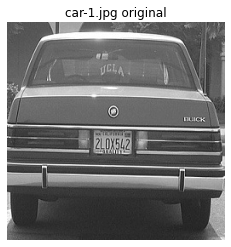

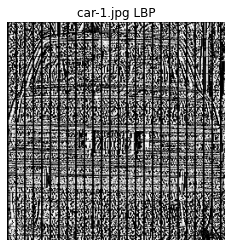

Image contain non-face objects


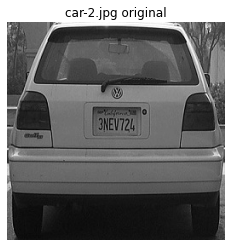

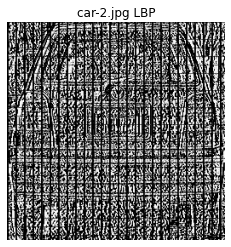

Image contain non-face objects


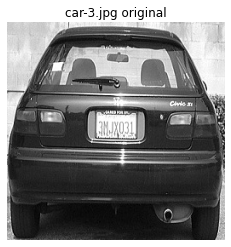

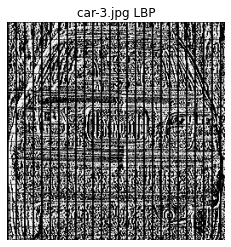

Image contain non-face objects


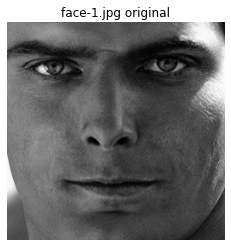

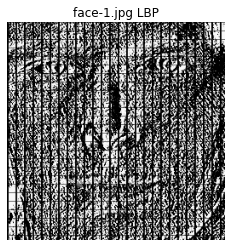

Image contain non-face objects


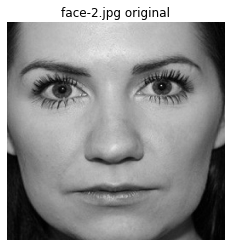

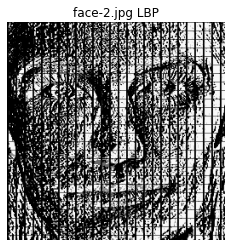

Image contain non-face objects


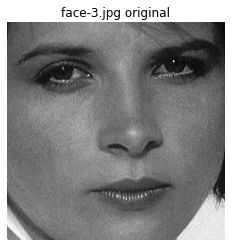

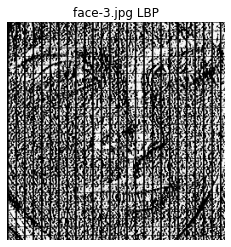

Image contain non-face objects


In [9]:
block_size = 10

train_face_A = cv2.imread('./DatasetA/face-1.jpg')
train_face_A = ICV_greyscale(train_face_A)

train_face_lsb_A,train_face_norm_hist_A = ICV_global_descriptor(train_face_A, block_size,show_img=False, show_hist = False)

train_face_B = cv2.imread('./DatasetA/face-2.jpg')
train_face_B = ICV_greyscale(train_face_B)

train_face_lsb_B,train_face_norm_hist_B = ICV_global_descriptor(train_face_B, block_size,show_img=False, show_hist = False)

train_face_C = cv2.imread('./DatasetA/face-3.jpg')
train_face_C = ICV_greyscale(train_face_C)

train_face_lsb_C,train_face_norm_hist_C = ICV_global_descriptor(train_face_C, block_size,show_img=False, show_hist = False)



threshold_A_B = ICV_histogram_intersection(train_face_norm_hist_A.ravel(), train_face_norm_hist_B.ravel())
threshold_B_C = ICV_histogram_intersection(train_face_norm_hist_B.ravel(), train_face_norm_hist_C.ravel())
threshold_A_C = ICV_histogram_intersection(train_face_norm_hist_A.ravel(), train_face_norm_hist_C.ravel())

classify_threshold = np.mean([threshold_A_B,threshold_A_C,threshold_B_C])



text_output_path =os.getcwd() + '\\texture_output' #setting output image path
if not os.path.isdir(text_output_path):
    os.mkdir(text_output_path)

images_path = os.getcwd()+'/DatasetA' #input image path
for images in os.listdir(images_path): #parsing through all files in directory
    if images[-3:]=='jpg': #checking if file is image or not
        images_name = images_path + '/' + images #getting image name
        img = cv2.imread(images_name) #reading image
        
        img = ICV_greyscale(cv2.imread(images_name))

        img_lsb, img_norm_hist = ICV_global_descriptor(img, block_size,show_img=False, show_hist = False)
        
        img_threshold = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_B.ravel())
        
        threshold_img_A = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_A.ravel())
        threshold_img_B = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_B.ravel())
        threshold_img_C = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_C.ravel())

        img_threshold = np.mean([threshold_img_A,threshold_img_B,threshold_img_C])
        
        plt.axis('off')
        plt.imshow(img,cmap='gray')
        plt.title(images + ' original')
        plt.savefig(text_output_path+"\\"+images[:-3]+"_original.jpg")
        plt.show()
        plt.axis('off')
        plt.imshow(img_lsb,cmap='gray')
        plt.title(images + ' LBP')
        plt.savefig(text_output_path+"\\"+images[:-3]+"_LBP.jpg")
        plt.show()
        
        if img_threshold <= (classify_threshold):
            print('Image contains face')
        else:
            print('Image contain non-face objects')


d) Increase the window size and perform classification again. Comment the results in the report.

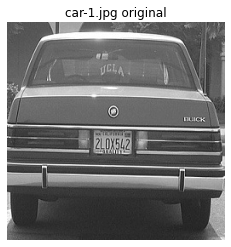

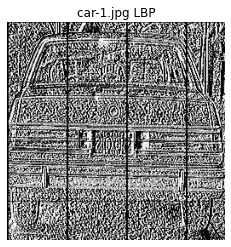

Image contain non-face objects


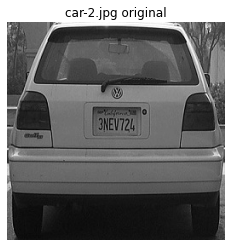

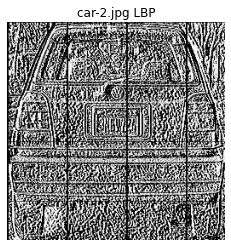

Image contain non-face objects


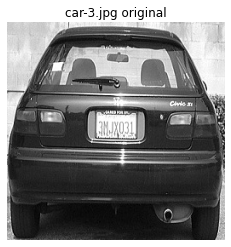

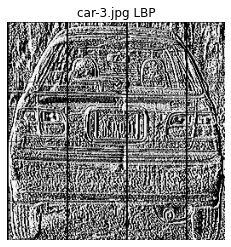

Image contain non-face objects


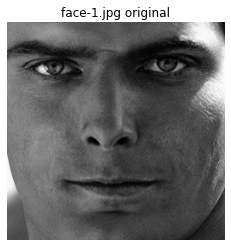

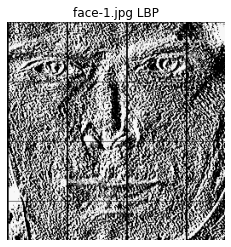

Image contain non-face objects


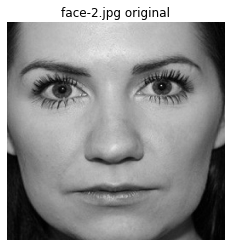

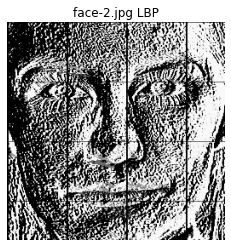

Image contains face


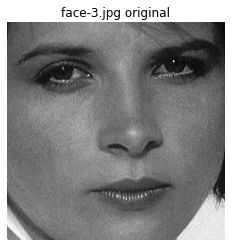

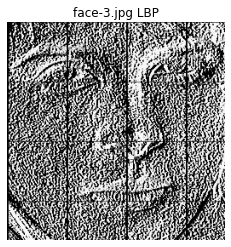

Image contain non-face objects


In [10]:
block_size = 70

train_face_A = cv2.imread('./DatasetA/face-1.jpg')
train_face_A = ICV_greyscale(train_face_A)

train_face_lsb_A,train_face_norm_hist_A = ICV_global_descriptor(train_face_A, block_size,show_img=False, show_hist = False)

train_face_B = cv2.imread('./DatasetA/face-2.jpg')
train_face_B = ICV_greyscale(train_face_B)

train_face_lsb_B,train_face_norm_hist_B = ICV_global_descriptor(train_face_B, block_size,show_img=False, show_hist = False)

train_face_C = cv2.imread('./DatasetA/face-3.jpg')
train_face_C = ICV_greyscale(train_face_C)

train_face_lsb_C,train_face_norm_hist_C = ICV_global_descriptor(train_face_C, block_size,show_img=False, show_hist = False)



threshold_A_B = ICV_histogram_intersection(train_face_norm_hist_A.ravel(), train_face_norm_hist_B.ravel())
threshold_B_C = ICV_histogram_intersection(train_face_norm_hist_B.ravel(), train_face_norm_hist_C.ravel())
threshold_A_C = ICV_histogram_intersection(train_face_norm_hist_A.ravel(), train_face_norm_hist_C.ravel())

classify_threshold = np.mean([threshold_A_B,threshold_A_C,threshold_B_C])



text_output_path =os.getcwd() + '\\texture_output' #setting output image path
if not os.path.isdir(text_output_path):
    os.mkdir(text_output_path)

images_path = os.getcwd()+'/DatasetA' #input image path
for images in os.listdir(images_path): #parsing through all files in directory
    if images[-3:]=='jpg': #checking if file is image or not
        images_name = images_path + '/' + images #getting image name
        img = cv2.imread(images_name) #reading image
        
        img = ICV_greyscale(cv2.imread(images_name))

        img_lsb, img_norm_hist = ICV_global_descriptor(img, block_size,show_img=False, show_hist = False)
        
        img_threshold = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_B.ravel())
        
        threshold_img_A = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_A.ravel())
        threshold_img_B = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_B.ravel())
        threshold_img_C = ICV_histogram_intersection(img_norm_hist.ravel(), train_face_norm_hist_C.ravel())

        img_threshold = np.mean([threshold_img_A,threshold_img_B,threshold_img_C])
        
        plt.axis('off')
        plt.imshow(img,cmap='gray')
        plt.title(images + ' original')
        plt.savefig(text_output_path+"\\"+images[:-3]+"_original.jpg")
        plt.show()
        plt.axis('off')
        plt.imshow(img_lsb,cmap='gray')
        plt.title(images + ' LBP')
        plt.savefig(text_output_path+"\\"+images[:-3]+"_LBP.jpg")
        plt.show()
        
        if img_threshold <= (classify_threshold):
            print('Image contains face')
        else:
            print('Image contain non-face objects')


e) Discuss how LBP can be used or modified for the analysis of dynamic textures in a video.